<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Convolutional-Neural-Networks" data-toc-modified-id="Convolutional-Neural-Networks-1">Convolutional Neural Networks</a></span><ul class="toc-item"><li><span><a href="#Requirements" data-toc-modified-id="Requirements-1.1">Requirements</a></span></li></ul></li><li><span><a href="#Experiments" data-toc-modified-id="Experiments-2">Experiments</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-3">Grading</a></span></li><li><span><a href="#Extra-Credit" data-toc-modified-id="Extra-Credit-4">Extra Credit</a></span></li></ul></div>

# Convolutional Neural Networks

For this assignment, use the `NeuralNetworkClassifier_CNN` class defined for you in `neuralnetworks_A4.py` contained in [A4code.tar](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A4code.tar).  This tar file also includes other functions you will use here, contained in `mlfuncs.py`.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import neuralnetworks_A4 as nn
import mlfuncs
import pandas as pd

## Requirements

First, look carefully at the `neuralnetworks_A4.py` and `optimizers.py` code provided above.  Some changes have been made in each. The most significant change is that the `train` function now accepts a `batch_size` argument so that the gradients we calculate don't have to be over the whole training set.  Recall that we can easily run out of memory with convolutional networks if we calculate gradients over the whole training set.  Also, `'scg'` is not a valid optimizer in this version of the code.

Implement the following functions:

    dataframe_result = run_these_parameters(X, T, n_folds,
                                            layers_structs, 
                                            methods, 
                                            epochs, 
                                            learning_rates.
                                            batch_sizes)
                                              
    result = train_this_partition(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest,
                                  struct,
                                  n_epochs, 
                                  method, 
                                  learning_rate,
                                  batch_size)
                                  
The file `mlfuncs.py` contains several functions you will need to define these two required functions.  They are illustrated in the following examples.

In [3]:
Y = np.array([0, 1, 1, 0, 0]).reshape(-1, 1)
T = np.array([0, 1, 0, 1, 0]).reshape(-1, 1)
mlfuncs.percent_equal(Y, T)

60.0

The purpose of that one is obvious.  This next one is needed for storing your network stucture in a pandas DataFrame.  The structure must be an immutable data type.  A list is mutable, but a tuple is not.  So we must make sure all parts of the network structure specification is composed of tuples, not lists.

In [4]:
struct = [[], [10]]
mlfuncs.list_to_tuple(struct)

((), (10,))

In [5]:
struct = [[[2, 4, 1], [5, 4, 2]], [20, 10]]
mlfuncs.list_to_tuple(struct)

(((2, 4, 1), (5, 4, 2)), (20, 10))

And here is a function that generates all training, validation, and testing partitions given the data and the number of folds.  It creates the partitions in a stratified manner, meaning all folds will have close to the same proportion of samples from each class.

In [6]:
X = np.arange(12).reshape(6, 2)
T = np.array([0, 0, 1, 0, 1, 1]).reshape(-1, 1)
X, T

(array([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]]),
 array([[0],
        [0],
        [1],
        [0],
        [1],
        [1]]))

In [7]:
for Xtrain, Ttrain, Xval, Tval, Xtest, Ttest in mlfuncs.generate_partitions(
    X, T, n_folds=3, classification=True
):
    print(
        "Xtrain: ",
        Xtrain,
        "\n",
        "Ttrain: ",
        Ttrain,
        "\n",
        "val: ",
        Xval,
        "\n",
        "Tval: ",
        Tval,
        "\n",
        "Xtest: ",
        Xtest,
        "\n",
        "Ttest: ",
        Ttest,
    )
    print()

Xtrain:  [[ 2  3]
 [10 11]] 
 Ttrain:  [[0]
 [1]] 
 val:  [[0 1]
 [8 9]] 
 Tval:  [[0]
 [1]] 
 Xtest:  [[6 7]
 [4 5]] 
 Ttest:  [[0]
 [1]]

Xtrain:  [[0 1]
 [8 9]] 
 Ttrain:  [[0]
 [1]] 
 val:  [[ 2  3]
 [10 11]] 
 Tval:  [[0]
 [1]] 
 Xtest:  [[6 7]
 [4 5]] 
 Ttest:  [[0]
 [1]]

Xtrain:  [[ 2  3]
 [10 11]] 
 Ttrain:  [[0]
 [1]] 
 val:  [[6 7]
 [4 5]] 
 Tval:  [[0]
 [1]] 
 Xtest:  [[0 1]
 [8 9]] 
 Ttest:  [[0]
 [1]]

Xtrain:  [[6 7]
 [4 5]] 
 Ttrain:  [[0]
 [1]] 
 val:  [[ 2  3]
 [10 11]] 
 Tval:  [[0]
 [1]] 
 Xtest:  [[0 1]
 [8 9]] 
 Ttest:  [[0]
 [1]]

Xtrain:  [[0 1]
 [8 9]] 
 Ttrain:  [[0]
 [1]] 
 val:  [[6 7]
 [4 5]] 
 Tval:  [[0]
 [1]] 
 Xtest:  [[ 2  3]
 [10 11]] 
 Ttest:  [[0]
 [1]]

Xtrain:  [[6 7]
 [4 5]] 
 Ttrain:  [[0]
 [1]] 
 val:  [[0 1]
 [8 9]] 
 Tval:  [[0]
 [1]] 
 Xtest:  [[ 2  3]
 [10 11]] 
 Ttest:  [[0]
 [1]]



The function `run_these_parameters` loops through all values in `layers_structs`, `methods`, `epochs`, `learning rates` and `batch_sizes`.  For each set of parameter values, it loops through all ways of creating training, validation, and testing partitions using `n_folds`.  For each of these repetitions, `train_this_partition` is called to create the specified convolutional neural network, trains it, collects the percent correct on training, validation, and test sets, and returns a list of parameter values and the three accuracies.  `run_these_parameters` returns all of these results as a `pandas` DataFrame with column names `('struct', 'method', 'n_epochs', 'learning_rate', 'batch_size', 'train %', 'val %', 'test %')`. 

The resulting DataFrame results stored in variable `df` can be summarized with a statement like

      df.groupby(['struct', 'method', 'n_epochs', 'learning_rate',
                  'batch_size']).mean())

Define the two required functions in code cells above this cell.

The following examples show examples of how they should run, as

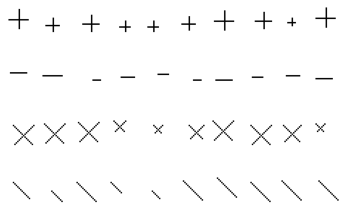

In [8]:
def make_images(n_each_class):
    """Make 20x20 black and white images with diamonds or squares for the two classes, as line drawings."""
    images = np.zeros((n_each_class * 4, 20, 20))  # nSamples, rows, columns
    radii = 3 + np.random.randint(10 - 5, size=(n_each_class * 4, 1))
    centers = np.zeros((n_each_class * 4, 2))
    for i in range(n_each_class * 4):
        r = radii[i, 0]
        centers[i, :] = r + 1 + np.random.randint(18 - 2 * r, size=(1, 2))
        x = int(centers[i, 0])
        y = int(centers[i, 1])
        if i < n_each_class:
            # plus
            images[i, x - r : x + r, y] = 1.0
            images[i, x, y - r : y + r] = 1.0
        elif i < n_each_class * 2:
            # minus
            images[i, x, y - r : y + r] = 1.0
        elif i < n_each_class * 3:
            # x
            images[i, range(x - r, x + r), range(y - r, y + r)] = 1.0
            images[i, range(x - r, x + r), range(y + r, y - r, -1)] = 1.0
        else:
            # /
            images[i, range(x - r, x + r), range(y - r, y + r)] = 1.0

    T = np.array(
        ["plus"] * n_each_class
        + ["minus"] * n_each_class
        + ["times"] * n_each_class
        + ["divide"] * n_each_class
    ).reshape(-1, 1)

    n, r, c = images.shape
    images = images.reshape(n, r, c, 1)  # add channel dimsension
    return images, T


n_each_class = 10
X, T = make_images(n_each_class)
p = 0
for i in range(4 * n_each_class):
    p += 1
    plt.subplot(4, n_each_class, p)
    plt.imshow(-X[i, :, :, 0], cmap="gray")
    plt.axis("off")

In [9]:
n_each_class = 500
X, T = make_images(n_each_class)

In [10]:
# X[0][0]
# list(X.shape[1:])
# print(np.unique(Ttrain))
# cnn = nn.NeuralNetworkClassifier_CNN(list(Xtrain.shape[1:]), struct[0], struct[1], np.unique(Ttrain))
# cnn.train( Xtrain, Ttrain, n_epochs, method=method, learning_rate=learning_rate, momentum=0, batch_size=batch_size, verbose=False)
# Ytest, _ = cnn.use(Xtest)
# print(mlfuncs.percent_equal(Ytest, Ttest))
# print(cnn)
# plt.plot(cnn.get_error_trace())
# print(f'MNIST CNN Test {100 * np.mean(Ytest == Ttest)} % correct, with {cnn.all_weights.size} weights')

In [11]:
# from A4mysolution import *

In [12]:
# begin Tony's solution

In [13]:
def train_this_partition(
    Xtrain,
    Ttrain,
    Xval,
    Tval,
    Xtest,
    Ttest,
    struct,
    epochs,
    method,
    learning_rate,
    batch_size,
):
    struct_tuple = mlfuncs.list_to_tuple(struct)
    return_list = [struct_tuple, method, epochs, learning_rate, batch_size]

    cnn = nn.NeuralNetworkClassifier_CNN(
        list(Xtrain.shape[1:]), struct[0], struct[1], np.unique(Ttrain)
    )
    cnn.train(
        Xtrain,
        Ttrain,
        epochs,
        method=method,
        learning_rate=learning_rate,
        momentum=0,
        batch_size=batch_size,
        verbose=False,
    )

    Ytrain, raw_train_outputs = cnn.use(Xtrain)
    return_list.append(mlfuncs.percent_equal(Ytrain, Ttrain))

    Yval, raw_val_outputs = cnn.use(Xval)
    return_list.append(mlfuncs.percent_equal(Yval, Tval))

    Ytest, raw_test_outputs = cnn.use(Xtest)
    return_list.append(mlfuncs.percent_equal(Ytest, Ttest))
    return return_list

In [14]:
struct = [[[2, 5, 1]], [5]]
n_epochs = 10
method = "adam"
learning_rate = 0.01
batch_size = 10

n_samples = X.shape[0]
rows = np.arange(n_samples)
np.random.shuffle(rows)
ntrain = int(n_samples * 0.8)
nval = int(n_samples * 0.1)
Xtrain = X[rows[:ntrain], ...]
Ttrain = T[rows[:ntrain], ...]
Xval = X[rows[ntrain : ntrain + nval], ...]
Tval = T[rows[ntrain : ntrain + nval], ...]
Xtest = X[rows[ntrain + nval :], ...]
Ttest = T[rows[ntrain + nval :], ...]

result = train_this_partition(
    Xtrain,
    Ttrain,
    Xval,
    Tval,
    Xtest,
    Ttest,
    struct,
    n_epochs,
    method,
    learning_rate,
    batch_size,
)
result

[(((2, 5, 1),), (5,)), 'adam', 10, 0.01, 10, 62.9375, 53.0, 53.0]

In [15]:
def run_these_parameters(
    X, T, n_folds, structs, methods, n_epochs, learning_rates, batch_sizes
):
    df = pd.DataFrame(
        [],
        columns=[
            "struct",
            "method",
            "n_epochs",
            "learning_rate",
            "batch_size",
            "train %",
            "val %",
            "test %",
        ],
    )
    for struct in structs:
        for method in methods:
            for epoch in n_epochs:
                for learning_rate in learning_rates:
                    for batch_size in batch_sizes:
                        for (
                            Xtrain,
                            Ttrain,
                            Xval,
                            Tval,
                            Xtest,
                            Ttest,
                        ) in mlfuncs.generate_partitions(
                            X, T, n_folds=n_folds, classification=True
                        ):
                            result = train_this_partition(
                                Xtrain,
                                Ttrain,
                                Xval,
                                Tval,
                                Xtest,
                                Ttest,
                                struct,
                                epoch,
                                method,
                                learning_rate,
                                batch_size,
                            )
                            result_series = pd.Series(result, index=df.columns)
                            df = df.append(result_series, ignore_index=True)
    return df

In [16]:
df = run_these_parameters(
    X,
    T,
    n_folds=4,
    structs=[
        # [ [], [] ],
        # [ [], [10] ],
        [[[5, 3, 1]], []],
        # [[[20, 3, 2], [5, 3, 1]], [20]],
    ],
    methods=["adam"],  # , 'sgd'],
    n_epochs=[10, 20],
    learning_rates=[0.01],  # , 0.1],
    batch_sizes=[
        -1,
        10,
    ],
)
df

,struct,method,n_epochs,learning_rate,batch_size,train %,val %,test %
0,"(((5, 3, 1),), ())",adam,10,0.01,-1,76.2,73.6,73.0
1,"(((5, 3, 1),), ())",adam,10,0.01,-1,63.1,62.0,62.0
2,"(((5, 3, 1),), ())",adam,10,0.01,-1,64.7,59.8,63.8
3,"(((5, 3, 1),), ())",adam,10,0.01,-1,69.0,65.0,65.0
4,"(((5, 3, 1),), ())",adam,10,0.01,-1,82.8,79.6,81.6
5,"(((5, 3, 1),), ())",adam,10,0.01,-1,82.1,80.6,80.6
6,"(((5, 3, 1),), ())",adam,10,0.01,-1,65.0,63.0,61.6
7,"(((5, 3, 1),), ())",adam,10,0.01,-1,73.6,72.0,71.4
8,"(((5, 3, 1),), ())",adam,10,0.01,-1,83.1,79.8,79.0
9,"(((5, 3, 1),), ())",adam,10,0.01,-1,58.3,55.8,57.2


# Experiments

When you have `train_this_partition` and `run_these_parameters`, use them to explore the parameter values, trying to find combinations of parameter values that result in high validation accuracies.  

Start with one value for each of the five parameters, but remember to specifiy them as a list of one element, like `learning_rates=[0.01]`.  Then run again with 3 or 4 values for one parameter.  Note the best value.  Use that value for that parameter, then add more values for a different parameter.  

Proceed this way for each of the parameter values.  Discuss what you observe after each call to `run_these_parameters` with at least two sentences for each run.  Do the parameter values you find that work best surprise you?  Also discuss how well the validation and test accuracies equal each other.

For each method, try various hidden layer structures, learning rates, and numbers of epochs.  Use the validation percent accuracy to pick the best hidden layers, learning rates and numbers of epochs for each method (ignore learning rates for scg).  Report training, validation and test accuracy for your best validation results for each of the three methods.


In [23]:
df = run_these_parameters(
    X,
    T,
    n_folds=4,
    layers_structs=[[[[5, 3, 1]], []]],
    methods=["sgd"],
    epochs=[10],
    learning_rates=[0.01],
    batch_sizes=[10],
)
df

,struct,method,n_epochs,learning_rate,batch_size,train %,val %,test %
0,"(((5, 3, 1),), ())",sgd,10,0.01,10,79.3,78.0,77.8
1,"(((5, 3, 1),), ())",sgd,10,0.01,10,81.0,77.4,76.4
2,"(((5, 3, 1),), ())",sgd,10,0.01,10,77.9,73.4,74.4
3,"(((5, 3, 1),), ())",sgd,10,0.01,10,79.5,77.6,79.0
4,"(((5, 3, 1),), ())",sgd,10,0.01,10,77.4,74.2,77.2
5,"(((5, 3, 1),), ())",sgd,10,0.01,10,80.0,75.0,77.8
6,"(((5, 3, 1),), ())",sgd,10,0.01,10,80.8,77.0,79.0
7,"(((5, 3, 1),), ())",sgd,10,0.01,10,78.9,79.0,76.2
8,"(((5, 3, 1),), ())",sgd,10,0.01,10,79.3,76.0,74.0
9,"(((5, 3, 1),), ())",sgd,10,0.01,10,79.6,74.6,75.2


I performed my initial run using some fairly simple values.the results I received were okay at best. Mostly in between 75% and 80% for validation. I arbitrarily chose to start from the bottom of my parameters with batch size as the next thing I would look into.

In [24]:
df = run_these_parameters(
    X,
    T,
    n_folds=4,
    layers_structs=[[[[5, 3, 1]], []]],
    methods=["sgd"],
    epochs=[10],
    learning_rates=[0.01],
    batch_sizes=[5, 10, 25, 50],
)
df

,struct,method,n_epochs,learning_rate,batch_size,train %,val %,test %
0,"(((5, 3, 1),), ())",sgd,10,0.01,5,80.5,76.0,77.6
1,"(((5, 3, 1),), ())",sgd,10,0.01,5,81.6,80.0,79.4
2,"(((5, 3, 1),), ())",sgd,10,0.01,5,80.6,74.4,77.6
3,"(((5, 3, 1),), ())",sgd,10,0.01,5,81.5,75.6,77.8
4,"(((5, 3, 1),), ())",sgd,10,0.01,5,79.0,77.8,76.2
5,"(((5, 3, 1),), ())",sgd,10,0.01,5,81.9,74.8,76.0
6,"(((5, 3, 1),), ())",sgd,10,0.01,5,83.9,80.8,80.6
7,"(((5, 3, 1),), ())",sgd,10,0.01,5,81.3,76.4,77.8
8,"(((5, 3, 1),), ())",sgd,10,0.01,5,82.6,79.8,80.4
9,"(((5, 3, 1),), ())",sgd,10,0.01,5,83.3,80.2,78.0


In [31]:
df.groupby(["struct", "method", "n_epochs", "learning_rate", "batch_size"]).mean()

train %  \
struct             method n_epochs learning_rate batch_size              
(((5, 3, 1),), ()) sgd    10       0.01          5           81.700000   
                                                 10          79.725000   
                                                 25          73.933333   
                                                 50          70.883333   

                                                                 val %  \
struct             method n_epochs learning_rate batch_size              
(((5, 3, 1),), ()) sgd    10       0.01          5           77.616667   
                                                 10          76.200000   
                                                 25          71.833333   
                                                 50          69.516667   

                                                                test %  
struct             method n_epochs learning_rate batch_size             
(((5, 3, 1),), ()) sgd    10       0.01          5           77.833333  
                                                 10          76.450000  
                                                 25          72.433333  
                                                 50          69.516667

In [32]:
df.groupby(["struct", "method", "n_epochs", "learning_rate", "batch_size"]).max()

train %  val %  \
struct             method n_epochs learning_rate batch_size                   
(((5, 3, 1),), ()) sgd    10       0.01          5              83.9   80.8   
                                                 10             82.1   79.2   
                                                 25             76.2   76.2   
                                                 50             73.4   72.4   

                                                             test %  
struct             method n_epochs learning_rate batch_size          
(((5, 3, 1),), ()) sgd    10       0.01          5             80.6  
                                                 10            80.2  
                                                 25            75.0  
                                                 50            72.4

I tried four different batch sizes:  5,10,25,50. Both max and mean were highest in the batch size of five in the test percent. I decided to use a batch size of five going forward. Validation and test error percentages were fairly similar.

In [33]:
df = run_these_parameters(
    X,
    T,
    n_folds=4,
    layers_structs=[[[[5, 3, 1]], []]],
    methods=["sgd"],
    epochs=[10],
    learning_rates=[0.01, 0.05, 0.1, 0.25],
    batch_sizes=[5],
)
df

,struct,method,n_epochs,learning_rate,batch_size,train %,val %,test %
0,"(((5, 3, 1),), ())",sgd,10,0.01,5,83.4,80.0,79.4
1,"(((5, 3, 1),), ())",sgd,10,0.01,5,83.7,77.0,77.2
2,"(((5, 3, 1),), ())",sgd,10,0.01,5,80.5,80.0,78.0
3,"(((5, 3, 1),), ())",sgd,10,0.01,5,83.2,79.4,79.4
4,"(((5, 3, 1),), ())",sgd,10,0.01,5,80.6,76.8,76.4
5,"(((5, 3, 1),), ())",sgd,10,0.01,5,78.5,77.6,75.0
6,"(((5, 3, 1),), ())",sgd,10,0.01,5,79.4,74.4,72.6
7,"(((5, 3, 1),), ())",sgd,10,0.01,5,81.6,78.0,76.6
8,"(((5, 3, 1),), ())",sgd,10,0.01,5,79.1,77.4,74.0
9,"(((5, 3, 1),), ())",sgd,10,0.01,5,81.6,77.8,81.6


In [34]:
df.groupby(["struct", "method", "n_epochs", "learning_rate", "batch_size"]).mean()

train %  \
struct             method n_epochs learning_rate batch_size              
(((5, 3, 1),), ()) sgd    10       0.01          5           80.958333   
                                   0.05          5           79.800000   
                                   0.10          5           79.008333   
                                   0.25          5           73.716667   

                                                                 val %  \
struct             method n_epochs learning_rate batch_size              
(((5, 3, 1),), ()) sgd    10       0.01          5           77.750000   
                                   0.05          5           72.250000   
                                   0.10          5           69.733333   
                                   0.25          5           63.516667   

                                                                test %  
struct             method n_epochs learning_rate batch_size             
(((5, 3, 1),), ()) sgd    10       0.01          5           77.416667  
                                   0.05          5           72.650000  
                                   0.10          5           70.100000  
                                   0.25          5           63.250000

In [35]:
df.groupby(["struct", "method", "n_epochs", "learning_rate", "batch_size"]).max()

train %  val %  \
struct             method n_epochs learning_rate batch_size                   
(((5, 3, 1),), ()) sgd    10       0.01          5              83.7   80.0   
                                   0.05          5              85.5   79.0   
                                   0.10          5              84.8   76.8   
                                   0.25          5              82.3   70.4   

                                                             test %  
struct             method n_epochs learning_rate batch_size          
(((5, 3, 1),), ()) sgd    10       0.01          5             81.6  
                                   0.05          5             78.2  
                                   0.10          5             74.4  
                                   0.25          5             68.0

I then tested learning rates. I chose to use learning rates of: 0.01, 0.05, 0.10, 0.25. in these cases the smallest learning rate, 0.01, had the largest test percent correct in both max and mean. I decided to use this one going forward. Validation and test percentages were very similar again.

In [42]:
df = run_these_parameters(
    X,
    T,
    n_folds=4,
    layers_structs=[[[[5, 3, 1]], []]],
    methods=["sgd"],
    epochs=[10, 25, 50, 100],
    learning_rates=[0.01],
    batch_sizes=[5],
)
df

,struct,method,n_epochs,learning_rate,batch_size,train %,val %,test %
0,"(((5, 3, 1),), ())",sgd,10,0.01,5,81.6,79.4,77.0
1,"(((5, 3, 1),), ())",sgd,10,0.01,5,80.1,77.8,76.2
2,"(((5, 3, 1),), ())",sgd,10,0.01,5,83.5,77.4,76.0
3,"(((5, 3, 1),), ())",sgd,10,0.01,5,81.7,77.2,78.0
4,"(((5, 3, 1),), ())",sgd,10,0.01,5,77.8,77.6,78.6
5,"(((5, 3, 1),), ())",sgd,10,0.01,5,84.2,80.4,81.4
6,"(((5, 3, 1),), ())",sgd,10,0.01,5,83.8,79.2,79.6
7,"(((5, 3, 1),), ())",sgd,10,0.01,5,78.8,78.6,76.0
8,"(((5, 3, 1),), ())",sgd,10,0.01,5,78.3,73.0,76.2
9,"(((5, 3, 1),), ())",sgd,10,0.01,5,80.4,74.6,75.6


In [43]:
df.groupby(["struct", "method", "n_epochs", "learning_rate", "batch_size"]).mean()

train %  \
struct             method n_epochs learning_rate batch_size              
(((5, 3, 1),), ()) sgd    10       0.01          5           80.775000   
                          25       0.01          5           84.508333   
                          50       0.01          5           87.175000   
                          100      0.01          5           91.391667   

                                                                 val %  \
struct             method n_epochs learning_rate batch_size              
(((5, 3, 1),), ()) sgd    10       0.01          5           77.500000   
                          25       0.01          5           78.766667   
                          50       0.01          5           78.800000   
                          100      0.01          5           79.766667   

                                                                test %  
struct             method n_epochs learning_rate batch_size             
(((5, 3, 1),), ()) sgd    10       0.01          5           76.850000  
                          25       0.01          5           79.183333  
                          50       0.01          5           78.500000  
                          100      0.01          5           80.050000

In [44]:
df.groupby(["struct", "method", "n_epochs", "learning_rate", "batch_size"]).max()

train %  val %  \
struct             method n_epochs learning_rate batch_size                   
(((5, 3, 1),), ()) sgd    10       0.01          5              84.2   80.4   
                          25       0.01          5              86.9   81.8   
                          50       0.01          5              89.6   80.6   
                          100      0.01          5              94.2   83.4   

                                                             test %  
struct             method n_epochs learning_rate batch_size          
(((5, 3, 1),), ()) sgd    10       0.01          5             81.4  
                          25       0.01          5             82.4  
                          50       0.01          5             82.8  
                          100      0.01          5             83.4

I then worked on the epochs. I chose to use: 10, 25, 50, and 100 epochs. The best mean and Max in test were found when I used 100 epochs. I decided to use 100 going forward. Validation and test percentages were again very similar. I did notice that  when using 100 epochs the validation test errors were identical. Using more epochs seemed to be helpful.

In [52]:
df = run_these_parameters(
    X,
    T,
    n_folds=4,
    layers_structs=[[[[5, 3, 1]], []]],
    methods=["sgd", "adam"],
    epochs=[100],
    learning_rates=[0.01],
    batch_sizes=[5],
)
df

,struct,method,n_epochs,learning_rate,batch_size,train %,val %,test %
0,"(((5, 3, 1),), ())",sgd,100,0.01,5,89.3,77.0,79.0
1,"(((5, 3, 1),), ())",sgd,100,0.01,5,90.8,79.0,78.0
2,"(((5, 3, 1),), ())",sgd,100,0.01,5,91.5,80.2,79.8
3,"(((5, 3, 1),), ())",sgd,100,0.01,5,91.0,79.2,78.6
4,"(((5, 3, 1),), ())",sgd,100,0.01,5,89.6,79.6,80.0
5,"(((5, 3, 1),), ())",sgd,100,0.01,5,92.3,81.8,80.6
6,"(((5, 3, 1),), ())",sgd,100,0.01,5,90.1,78.4,77.8
7,"(((5, 3, 1),), ())",sgd,100,0.01,5,92.3,81.0,82.8
8,"(((5, 3, 1),), ())",sgd,100,0.01,5,91.0,77.8,79.2
9,"(((5, 3, 1),), ())",sgd,100,0.01,5,89.2,76.8,76.2


In [53]:
df.groupby(["struct", "method", "n_epochs", "learning_rate", "batch_size"]).mean()

train %  val %  \
struct             method n_epochs learning_rate batch_size                     
(((5, 3, 1),), ()) adam   100      0.01          5           46.158333  42.65   
                   sgd    100      0.01          5           90.708333  79.20   

                                                                test %  
struct             method n_epochs learning_rate batch_size             
(((5, 3, 1),), ()) adam   100      0.01          5           43.416667  
                   sgd    100      0.01          5           79.450000

In [54]:
df.groupby(["struct", "method", "n_epochs", "learning_rate", "batch_size"]).max()

train %  val %  \
struct             method n_epochs learning_rate batch_size                   
(((5, 3, 1),), ()) adam   100      0.01          5              65.3   61.4   
                   sgd    100      0.01          5              93.5   81.8   

                                                             test %  
struct             method n_epochs learning_rate batch_size          
(((5, 3, 1),), ()) adam   100      0.01          5             62.0  
                   sgd    100      0.01          5             82.8

I then worked on methods. I used: SGD and Adam. SGD significantly outperformed Adam in both Max and mean. I chose to use SGD going forward. Validation test percentages were again very similar.

In [57]:
df = run_these_parameters(
    X,
    T,
    n_folds=4,
    layers_structs=[
        [[], []],
        [[], [10]],
        [[[5, 3, 1]], []],
        [[[20, 3, 2], [5, 3, 1]], [20]],
        [[[30, 5, 3], [5, 3, 1]], [20], [10]],
    ],
    methods=["sgd"],
    epochs=[100],
    learning_rates=[0.01],
    batch_sizes=[5],
)
df

,struct,method,n_epochs,learning_rate,batch_size,train %,val %,test %
0,"((), ())",sgd,100,0.01,5,93.7,76.2,80.2
1,"((), ())",sgd,100,0.01,5,94.2,73.4,80.0
2,"((), ())",sgd,100,0.01,5,93.6,74.2,80.0
3,"((), ())",sgd,100,0.01,5,94.8,81.6,76.2
4,"((), ())",sgd,100,0.01,5,94.7,77.2,78.2
5,"((), ())",sgd,100,0.01,5,94.4,76.6,77.8
6,"((), ())",sgd,100,0.01,5,94.7,80.0,76.0
7,"((), ())",sgd,100,0.01,5,94.0,78.6,77.4
8,"((), ())",sgd,100,0.01,5,95.5,76.2,76.8
9,"((), ())",sgd,100,0.01,5,93.8,80.4,73.0


In [58]:
df.groupby(["struct", "method", "n_epochs", "learning_rate", "batch_size"]).mean()

,,,,,train %,val %,test %
struct,method,n_epochs,learning_rate,batch_size,,,
"((), ())",sgd,100,0.01,5,94.458333,77.300000,77.483333
"((), (10,))",sgd,100,0.01,5,94.316667,78.066667,77.833333
"(((5, 3, 1),), ())",sgd,100,0.01,5,90.841667,78.850000,79.066667
"(((20, 3, 2), (5, 3, 1)), (20,))",sgd,100,0.01,5,66.283333,64.416667,64.566667
"(((30, 5, 3), (5, 3, 1)), (20,), (10,))",sgd,100,0.01,5,68.566667,66.233333,65.983333


In [59]:
df.groupby(["struct", "method", "n_epochs", "learning_rate", "batch_size"]).max()

,,,,,train %,val %,test %
struct,method,n_epochs,learning_rate,batch_size,,,
"((), ())",sgd,100,0.01,5,95.5,81.6,80.2
"((), (10,))",sgd,100,0.01,5,95.9,82.0,81.4
"(((5, 3, 1),), ())",sgd,100,0.01,5,94.6,83.0,83.2
"(((20, 3, 2), (5, 3, 1)), (20,))",sgd,100,0.01,5,72.9,68.6,69.0
"(((30, 5, 3), (5, 3, 1)), (20,), (10,))",sgd,100,0.01,5,74.6,72.6,71.8


I then worked on layer structures. I tested five different structures: </br>
                                 [], [], </br>
                               [], [10], </br>
                             [[5, 3, 1]], [], </br>
                              [[20, 3, 2], [5, 3, 1]], [20], </br>
                                [[30, 5, 3], [5, 3, 1]], [20], [10] </br>
Of these structures the simplest three had the highest test percentage correct in both max and mean, with   [[5, 3, 1]], [], having the highest in both. Another argument for simpler being better. Validation and test percentages were getting very similar.

In [48]:
n_samples = X.shape[0]
rows = np.arange(n_samples)
np.random.shuffle(rows)

n_train = round(n_samples * 0.8)

Xtrain = X[rows[:n_train], :]
Ttrain = T[rows[:n_train], :]
Xtest = X[rows[n_train:], :]
Ttest = T[rows[n_train:], :]

In [80]:
struct = [[[5, 3, 1]], []]
method = "sgd"
epochs = 100
learning_rate = 0.01
batch_size = 5
best_cnn = nn.NeuralNetworkClassifier_CNN(
    list(Xtrain.shape[1:]), struct[0], struct[1], np.unique(Ttrain)
)
best_cnn.train(
    Xtrain,
    Ttrain,
    epochs,
    method=method,
    learning_rate=learning_rate,
    momentum=0,
    batch_size=batch_size,
    verbose=False,
)

Ytrain, raw_train_outputs = best_cnn.use(Xtrain)

Ytest, raw_test_outputs = best_cnn.use(Xtest)

In [79]:
import pandas


def confusion_matrix(Y_classes, T):
    class_names = np.unique(T)
    table = []
    for true_class in class_names:
        row = []
        for Y_class in class_names:
            row.append(100 * np.mean(Y_classes[T == true_class] == Y_class))
        table.append(row)
    conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
    # cf.style.background_gradient(cmap='Blues').format("{:.1f} %")
    print("Percent Correct")
    return conf_matrix.style.background_gradient(cmap="Blues").format("{:.1f}")

In [83]:
confusion_matrix(Ytest, Ttest)

Percent Correct


,diamond,square
diamond,94.1,5.9
square,33.3,66.7


I trained a model using the best parameters I found and  then tested using test data. I obtained the above results. The model was very good at correctly identifying diamonds. It seemed to have more trouble getting squares correctly identified. It had a tendency to mis-classify squares as diamonds. The model may need even more training time to become proficient at making this distinction.

# Grading

Download [A4grader.tar](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A4grader.tar), extract `A4grader.py` before running the following cell.

In [16]:
%run -i A4grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Feudale-A4.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing:

    def make_images(n_each_class):
        images = np.zeros((n_each_class * 2, 20, 20))  # nSamples, rows, columns
        radii = 3 + np.random.randint(10 - 5, size=(n_each_class * 2, 1))
        centers = np.zeros((n_each_class * 2, 2))
        for i in range(n_each_class * 2):
            r = radii[i, 0]
            centers[i, :] = r + 1 + np.random.randint(18 - 2 * r, size=(1, 2))
            x = int(centers[i, 0])
            y = int(centers[i, 1])
            if i < n_each_class:
                # squares
                images[i, x - r:x + r, y + r] = 1.0
                images[i, x - r:x + r, y - r] = 1.0
                images[i, x - r, y - r:y + r] = 1.0
                images[i, x + r, y - r:y + r + 1] = 1.0
            else:
 

<Figure size 432x288 with 0 Axes>

# Extra Credit

Repeat the above experiment using a convolutional neural network defined in `Pytorch`.  Implement this yourself by directly calling `torch.nn` functions.

In [16]:
import numpy as np
import torch


class ConvNet(torch.nn.Module):
    def __init__(
        self,
        n_inputs,
        n_hiddens_per_conv_layer,
        n_hiddens_per_fc_layer,
        n_outputs,
        patch_size_per_conv_layer,
        stride_per_conv_layer,
        activation_function="tanh",
        device="cpu",
    ):

        super().__init__()

        self.device = device

        n_conv_layers = len(n_hiddens_per_conv_layer)
        if (
            len(patch_size_per_conv_layer) != n_conv_layers
            or len(stride_per_conv_layer) != n_conv_layers
        ):
            raise Exception(
                "The lengths of n_hiddens_per_conv_layer, patch_size_per_conv_layer, and stride_per_conv_layer must be equal."
            )

        self.activation_function = (
            torch.tanh if activation_function == "tanh" else torch.relu
        )

        # Create all convolutional layers
        # First argument to first Conv2d is number of channels for each pixel.
        # Just 1 for our grayscale images.
        n_in = 1
        input_hw = int(
            np.sqrt(n_inputs)
        )  # original input image height (=width because image assumed square)
        self.conv_layers = torch.nn.ModuleList()
        for nh, patch_size, stride in zip(
            n_hiddens_per_conv_layer, patch_size_per_conv_layer, stride_per_conv_layer
        ):
            self.conv_layers.append(
                torch.nn.Conv2d(n_in, nh, kernel_size=patch_size, stride=stride)
            )
            conv_layer_output_hw = (input_hw - patch_size) // stride + 1
            input_hw = conv_layer_output_hw  # for next trip through this loop
            n_in = nh

        # Create all fully connected layers.  First must determine number of inputs to first
        # fully-connected layer that results from flattening the images coming out of the last
        # convolutional layer.
        n_in = input_hw ** 2 * n_in  # n_hiddens_per_fc_layer[0]
        self.fc_layers = torch.nn.ModuleList()
        for nh in n_hiddens_per_fc_layer:
            self.fc_layers.append(torch.nn.Linear(n_in, nh))
            n_in = nh
        self.fc_layers.append(torch.nn.Linear(n_in, n_outputs))

        self.to(self.device)

    def forward_all_outputs(self, X):
        n_samples = X.shape[0]
        Ys = [X]
        for conv_layer in self.conv_layers:
            Ys.append(self.activation_function(conv_layer(Ys[-1])))

        for layeri, fc_layer in enumerate(self.fc_layers[:-1]):
            if layeri == 0:
                Ys.append(
                    self.activation_function(fc_layer(Ys[-1].reshape(n_samples, -1)))
                )
            else:
                Ys.append(self.activation_function(fc_layer(Ys[-1])))

        Ys.append(self.fc_layers[-1](Ys[-1]))
        return Ys

    def forward(self, X):
        Ys = self.forward_all_outputs(X)
        return Ys[-1]

    def train(
        self, X, T, batch_size, n_epochs, learning_rate, method="sgd", verbose=True
    ):

        # Set data matrices to torch.tensors if not already.
        if not isinstance(X, torch.Tensor):
            X = torch.from_numpy(X).float().to(self.device)
        if not isinstance(T, torch.Tensor):
            T = (
                torch.from_numpy(T).long().to(self.device)
            )  # required for classification in pytorch

        X.requires_grad_(True)

        self.classes = torch.unique(T)

        if method == "sgd":
            optimizer = torch.optim.SGD(
                self.parameters(), lr=learning_rate, momentum=0.9
            )
        else:
            optimizer = torch.optim.Adam(self.parameters(), lr=learning_rate)

        CELoss = torch.nn.CrossEntropyLoss(reduction="mean")
        self.error_trace = []

        for epoch in range(n_epochs):

            num_batches = X.shape[0] // batch_size
            loss_sum = 0

            for k in range(num_batches):
                start = k * batch_size
                end = (k + 1) * batch_size
                X_batch = X[start:end, ...]
                T_batch = T[start:end, ...]

                Y = self.forward(X_batch)

                loss = CELoss(Y, T_batch)
                loss.backward()

                # Update parameters
                optimizer.step()
                optimizer.zero_grad()

                loss_sum += loss

            self.error_trace.append(loss_sum / num_batches)

            if n_epochs >= 10:
                if verbose and (epoch + 1) % (n_epochs // 10) == 0:
                    print(
                        f"{method}: Epoch {epoch + 1} Loss {self.error_trace[-1]:.3f}"
                    )
            else:
                print(f"{method}: Epoch {epoch + 1} Loss {self.error_trace[-1]:.3f}")

        return self

    def softmax(self, Y):
        """Apply to final layer weighted sum outputs"""
        # Trick to avoid overflow
        maxY = torch.max(Y, axis=1)[0].reshape((-1, 1))
        expY = torch.exp(Y - maxY)
        denom = torch.sum(expY, axis=1).reshape((-1, 1))
        Y = expY / denom
        return Y

    def use(self, X):
        # Set input matrix to torch.tensors if not already.
        if not isinstance(X, torch.Tensor):
            X = torch.from_numpy(X).float().to(self.device)
        Y = self.forward(X)
        probs = self.softmax(Y)
        classes = self.classes[torch.argmax(probs, axis=1).cpu().numpy()]
        return classes.cpu().numpy(), probs.detach().cpu().numpy()

In [17]:
device = "cpu"
if torch.cuda.is_available():
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Running on", device)

Running on cpu


In [18]:
def indicators_to_num(T):
    unique = np.unique(T).tolist()
    num_T = []
    for t in T:
        num_T.append(unique.index(t))
    return np.array(num_T)

In [19]:
from functools import reduce
from operator import mul

num_inputs = reduce(mul, X.shape[1:])
T_as_num = indicators_to_num(T)
cnnet = ConvNet(
    num_inputs,
    [10, 20],
    [5, 5],
    len(np.unique(T)),
    patch_size_per_conv_layer=[5, 7],
    stride_per_conv_layer=[2, 2],
    device=device,
)
cnnet.to(device)
X_cnn = X.reshape(-1, 1, 20, 20)
n_epochs = 1
print(n_epochs // 10)
batch_size = 10
learning_rate = 0.001
cnnet.train(X_cnn, T_as_num, batch_size, n_epochs, learning_rate, method="adam")
# cnn = nn.NeuralNetworkClassifier_CNN(
#         list(Xtrain.shape[1:]), struct[0], struct[1], np.unique(Ttrain)
#     )

0
adam: Epoch 1 Loss 1.291


ConvNet(
  (conv_layers): ModuleList(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(2, 2))
    (1): Conv2d(10, 20, kernel_size=(7, 7), stride=(2, 2))
  )
  (fc_layers): ModuleList(
    (0): Linear(in_features=20, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=5, bias=True)
    (2): Linear(in_features=5, out_features=4, bias=True)
  )
)

In [62]:
from functools import reduce
from operator import mul


def cnn_train_this_partition(
    Xtrain,
    Ttrain,
    Xval,
    Tval,
    Xtest,
    Ttest,
    struct,
    patch_size_per_conv_layer,
    stride_per_conv_layer,
    n_epochs,
    method,
    learning_rate,
    batch_size,
):
    struct_tuple = mlfuncs.list_to_tuple(struct)
    return_list = [struct_tuple, method, n_epochs, learning_rate, batch_size]

    num_inputs = reduce(mul, Xtrain.shape[1:])
    cnn = ConvNet(
        num_inputs,
        struct[0],
        struct[1],
        len(np.unique(T)),
        patch_size_per_conv_layer=patch_size_per_conv_layer,
        stride_per_conv_layer=stride_per_conv_layer,
        device=device,
    )
    cnn.to(device)

    cnn.train(
        Xtrain,
        Ttrain,
        batch_size,
        n_epochs,
        learning_rate,
        method=method,
        verbose=False,
    )

    Ytrain, raw_train_outputs = cnn.use(Xtrain)
    return_list.append(mlfuncs.percent_equal(Ytrain, Ttrain))

    Yval, raw_val_outputs = cnn.use(Xval)
    return_list.append(mlfuncs.percent_equal(Yval, Tval))

    Ytest, raw_test_outputs = cnn.use(Xtest)
    return_list.append(mlfuncs.percent_equal(Ytest, Ttest))
    return return_list

In [76]:
n_samples = X.shape[0]
rows = np.arange(n_samples)
np.random.shuffle(rows)
ntrain = int(n_samples * 0.8)
nval = int(n_samples * 0.1)
Xtrain = X[rows[:ntrain], ...]
Ttrain = T[rows[:ntrain], ...]
Xval = X[rows[ntrain : ntrain + nval], ...]
Tval = T[rows[ntrain : ntrain + nval], ...]
Xtest = X[rows[ntrain + nval :], ...]
Ttest = T[rows[ntrain + nval :], ...]

struct = [[10, 20], [5, 5]]
n_epochs = 10
method = "adam"
learning_rate = 0.01
batch_size = 10
patch_size_per_conv_layer = [5, 7]
stride_per_conv_layer = [2, 2]
print(indicators_to_num(T))

for (
    Xtrain,
    Ttrain,
    Xval,
    Tval,
    Xtest,
    Ttest,
) in mlfuncs.generate_partitions(X, T, n_folds=3, classification=True):
    print(Xtrain.shape)
    print(Ttrain)
    print(np.unique(Ttrain))
    print(indicators_to_num(Ttrain))
    result = cnn_train_this_partition(
        Xtrain.reshape(
            -1,
            Xtrain.shape[-1],
            Xtrain.shape[-2],
            Xtrain.shape[-3],
        ),
        indicators_to_num(Ttrain),
        Xval.reshape(
            -1,
            Xval.shape[-1],
            Xval.shape[-2],
            Xval.shape[-3],
        ),
        indicators_to_num(Tval),
        Xtest.reshape(
            -1,
            Xtest.shape[-1],
            Xtest.shape[-2],
            Xtest.shape[-3],
        ),
        indicators_to_num(Ttest),
        struct,
        patch_size_per_conv_layer,
        stride_per_conv_layer,
        n_epochs,
        method,
        learning_rate,
        batch_size,
    )
    print(result)
    break

[2 2 2 ... 0 0 0]
(672, 20, 20, 1)
[['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['divide']
 ['di

In [64]:
def cnn_run_these_parameters(
    X, T, n_folds, structs, methods, n_epochs, learning_rates, batch_sizes
):
    df = pd.DataFrame(
        [],
        columns=[
            "struct",
            "method",
            "n_epochs",
            "learning_rate",
            "batch_size",
            "train %",
            "val %",
            "test %",
        ],
    )

    for struct in structs:
        main_struct = struct[0]
        patch_size_per_conv_layer = struct[1]
        stride_per_conv_layer = struct[2]
        print(main_struct)
        print(patch_size_per_conv_layer)
        print(stride_per_conv_layer)
        for method in methods:
            print(method)
            for epoch in n_epochs:
                print(epoch)
                for learning_rate in learning_rates:
                    print(learning_rate)
                    for batch_size in batch_sizes:
                        print(batch_size)
                        for (
                            Xtrain,
                            Ttrain,
                            Xval,
                            Tval,
                            Xtest,
                            Ttest,
                        ) in mlfuncs.generate_partitions(
                            X, T, n_folds=n_folds, classification=True
                        ):
                            print(
                                Xtrain.reshape(
                                    -1,
                                    Xtrain.shape[-1],
                                    Xtrain.shape[-2],
                                    Xtrain.shape[-3],
                                ).shape
                            )
                            print(indicators_to_num(Ttrain).shape)

                            result = cnn_train_this_partition(
                                Xtrain.reshape(
                                    -1,
                                    Xtrain.shape[-1],
                                    Xtrain.shape[-2],
                                    Xtrain.shape[-3],
                                ),
                                indicators_to_num(Ttrain),
                                Xval.reshape(
                                    -1,
                                    Xval.shape[-1],
                                    Xval.shape[-2],
                                    Xval.shape[-3],
                                ),
                                indicators_to_num(Tval),
                                Xtest.reshape(
                                    -1,
                                    Xtest.shape[-1],
                                    Xtest.shape[-2],
                                    Xtest.shape[-3],
                                ),
                                indicators_to_num(Ttest),
                                main_struct,
                                patch_size_per_conv_layer,
                                stride_per_conv_layer,
                                epoch,
                                method,
                                learning_rate,
                                batch_size,
                            )
                            result_series = pd.Series(result, index=df.columns)
                            df = df.append(result_series, ignore_index=True)
    return df

In [65]:
df = cnn_run_these_parameters(
    X,
    T,
    n_folds=3,
    structs=[[[[10, 20], [5, 5]], [5, 7], [2, 2]]],
    methods=["adam"],
    n_epochs=[10],
    learning_rates=[0.01],
    batch_sizes=[10],
)
df

[[10, 20], [5, 5]]
[5, 7]
[2, 2]
adam
10
0.01
10
(672, 1, 20, 20)
(672,)
(664, 1, 20, 20)
(664,)
(672, 1, 20, 20)
(672,)
(664, 1, 20, 20)
(664,)
(664, 1, 20, 20)
(664,)
(664, 1, 20, 20)
(664,)


,struct,method,n_epochs,learning_rate,batch_size,train %,val %,test %
0,"((10, 20), (5, 5))",adam,10,0.01,10,25.0,25.0,25.0
1,"((10, 20), (5, 5))",adam,10,0.01,10,25.0,25.0,25.0
2,"((10, 20), (5, 5))",adam,10,0.01,10,25.0,25.0,25.0
3,"((10, 20), (5, 5))",adam,10,0.01,10,25.0,25.0,25.0
4,"((10, 20), (5, 5))",adam,10,0.01,10,25.0,25.0,25.0
5,"((10, 20), (5, 5))",adam,10,0.01,10,25.0,25.0,25.0


In [28]:
df.groupby(["struct", "method", "n_epochs", "learning_rate", "batch_size"]).mean()

,,,,,train %,val %,test %
struct,method,n_epochs,learning_rate,batch_size,,,
"((10, 20), (5, 5))",sgd,5,0.01,5,25.0,25.0,25.0


In [32]:
df.groupby(["struct", "method", "n_epochs", "learning_rate", "batch_size"]).max()

,,,,,train %,val %,test %
struct,method,n_epochs,learning_rate,batch_size,,,
"((10, 20), (5, 5))",sgd,1,0.01,5,25.0,25.0,25.0
